<a href="https://colab.research.google.com/github/sawyerhunt12/MLB-Runs-Scored/blob/main/MLB_Runs_Scored_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data = pd.read_csv('gdrive/My Drive/MLB_stolen_bases.csv')

In [3]:
data.head()

,"last_name, first_name",player_id,year,ab,pa,hit,walk,batting_avg,slg_percent,on_base_percent,...,b_ab_scoring,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,r_total_pickoff,Unnamed: 22
0,"Grisham, Trent",663757,2023,469,555,93,75,0.198,0.352,0.315,...,118,3,0,0,67,14,1,0,2,NaN
1,"Candelario, Jeimer",600869,2023,505,576,127,53,0.251,0.471,0.336,...,106,1,0,0,77,8,0,0,1,NaN
2,"Hoerner, Nico",663538,2023,619,688,175,49,0.283,0.383,0.346,...,139,7,0,0,98,34,9,0,1,NaN
3,"Carroll, Corbin",682998,2023,565,645,161,57,0.285,0.506,0.362,...,118,3,2,0,116,42,12,0,0,NaN
4,"Santander, Anthony",623993,2023,591,656,152,55,0.257,0.472,0.325,...,128,1,0,0,81,5,0,0,0,NaN


In [4]:
# Explore correlations in the data
data.corr()

<ipython-input-4-22f6a21b8219>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,player_id,year,ab,pa,hit,walk,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,...,b_ab_scoring,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,r_total_pickoff,Unnamed: 22
player_id,1.000000,NaN,-0.054882,-0.064900,-0.029934,-0.068774,0.012178,-0.040166,-0.003757,-0.030977,...,-0.087436,0.242369,0.112629,0.085587,0.006036,0.228652,0.140117,0.054557,0.258592,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ab,-0.054882,NaN,1.000000,0.946264,0.813184,0.226662,0.284085,0.241507,0.170005,0.239481,...,0.611598,0.191682,-0.029628,0.034708,0.621067,0.291051,0.171507,0.215520,0.199762,NaN
pa,-0.064900,NaN,0.946264,1.000000,0.752170,0.516605,0.239190,0.320903,0.375538,0.372241,...,0.581486,0.154964,-0.014163,0.066030,0.727959,0.265649,0.167945,0.173511,0.178747,NaN
hit,-0.029934,NaN,0.813184,0.752170,1.000000,0.136708,0.785863,0.481234,0.513920,0.540441,...,0.339014,0.248385,0.030862,0.031657,0.670489,0.362575,0.225172,0.158047,0.207666,NaN
walk,-0.068774,NaN,0.226662,0.516605,0.136708,1.000000,-0.016385,0.332825,0.675488,0.489330,...,0.120865,-0.040817,0.008184,0.128668,0.540962,-0.023342,0.018766,-0.030343,0.013639,NaN
batting_avg,0.012178,NaN,0.284085,0.239190,0.785863,-0.016385,1.000000,0.549602,0.666546,0.645965,...,-0.078972,0.192347,0.084309,0.015472,0.440809,0.263676,0.175863,0.030225,0.117918,NaN
slg_percent,-0.040166,NaN,0.241507,0.320903,0.481234,0.332825,0.549602,1.000000,0.611806,0.958351,...,0.130161,0.029895,0.027425,0.074309,0.663694,0.098742,0.043517,-0.041937,0.033805,NaN
on_base_percent,-0.003757,NaN,0.170005,0.375538,0.513920,0.675488,0.666546,0.611806,1.000000,0.812232,...,-0.096209,0.054485,0.061255,0.089323,0.621238,0.139799,0.119504,-0.051737,0.041380,NaN
on_base_plus_slg,-0.030977,NaN,0.239481,0.372241,0.540441,0.489330,0.645965,0.958351,0.812232,1.000000,...,0.061252,0.041718,0.042341,0.087050,0.713745,0.123292,0.075239,-0.049607,0.039870,NaN


In [5]:
data.columns

Index(['last_name, first_name', 'player_id', 'year', 'ab', 'pa', 'hit', 'walk',
       'batting_avg', 'slg_percent', 'on_base_percent', 'on_base_plus_slg',
       'r_total_caught_stealing', 'r_total_stolen_base', 'b_ab_scoring',
       'r_caught_stealing_2b', 'r_caught_stealing_3b',
       'r_caught_stealing_home', 'r_run', 'r_stolen_base_2b',
       'r_stolen_base_3b', 'r_stolen_base_home', 'r_total_pickoff',
       'Unnamed: 22'],
      dtype='object')

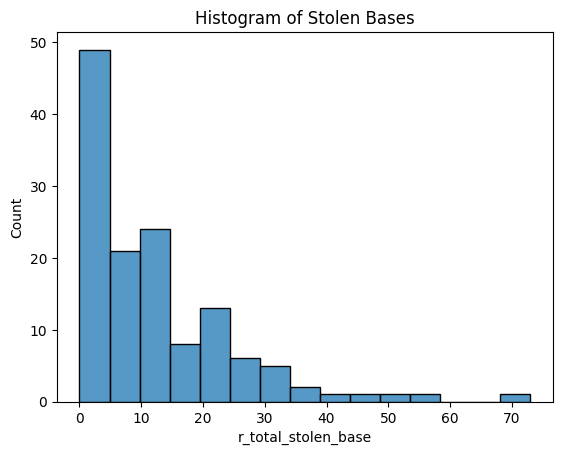

In [6]:
# Histogram of stolen bases
sns.histplot(data = data, x = "r_total_stolen_base")
plt.title("Histogram of Stolen Bases")
plt.show()

In [7]:
# 75th, 25th, and 90th percentile of stolen bases
seventy_five_sb = data["r_total_stolen_base"].quantile(0.75)
twenty_five_sb = data["r_total_stolen_base"].quantile(0.25)
ninety_sb = data["r_total_stolen_base"].quantile(0.90)

# sb iqr
sb_iqr = seventy_five_sb - twenty_five_sb

# upper and lower outliers
upper_outlier_sb = seventy_five_sb + (1.5 * sb_iqr)
lower_outlier_sb = twenty_five_sb - (1.5 * sb_iqr)

print("75th Percentile:", seventy_five_sb)
print("25th Percentile:", twenty_five_sb)
print("90th Percentile:", ninety_sb)
print("Interquartile Range:", sb_iqr)
print("Upper Outlier Limit:", upper_outlier_sb)
print("Lower Outlier Limit:", lower_outlier_sb) # The lower outlier limit is negative; therefore, there are no outliers below the 25th percentile.

75th Percentile: 16.0
25th Percentile: 3.0
90th Percentile: 28.0
Interquartile Range: 13.0
Upper Outlier Limit: 35.5
Lower Outlier Limit: -16.5


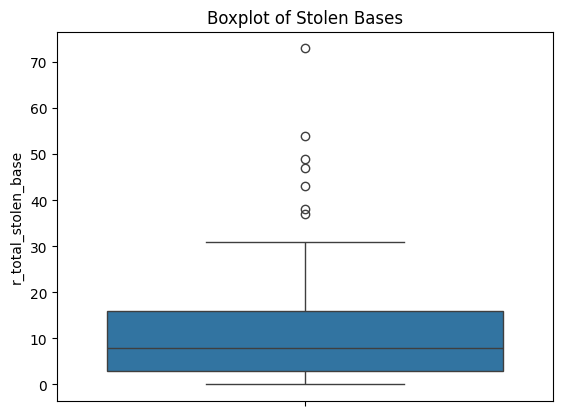

In [8]:
# Boxplot of stolen bases
sns.boxplot(data = data, y = "r_total_stolen_base")
plt.title("Boxplot of Stolen Bases")
plt.show()

In [9]:
# Summary statistics of stolen bases
data["r_total_stolen_base"].describe()

count    133.000000
mean      11.751880
std       12.585108
min        0.000000
25%        3.000000
50%        8.000000
75%       16.000000
max       73.000000
Name: r_total_stolen_base, dtype: float64

In [10]:
# How many players that did not steal any bases
data[data["r_total_stolen_base"] == 0].count()

last_name, first_name      13
player_id                  13
year                       13
ab                         13
pa                         13
hit                        13
walk                       13
batting_avg                13
slg_percent                13
on_base_percent            13
on_base_plus_slg           13
r_total_caught_stealing    13
r_total_stolen_base        13
b_ab_scoring               13
r_caught_stealing_2b       13
r_caught_stealing_3b       13
r_caught_stealing_home     13
r_run                      13
r_stolen_base_2b           13
r_stolen_base_3b           13
r_stolen_base_home         13
r_total_pickoff            13
Unnamed: 22                 0
dtype: int64

In [35]:
# Sort data by most stolen bases
sb_sorted_most = data.sort_values(by = "r_total_stolen_base", ascending = False)
sb_sorted_most.head(10)

,"last_name, first_name",player_id,year,ab,pa,hit,walk,batting_avg,slg_percent,on_base_percent,...,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,r_total_pickoff,Unnamed: 22,predicted_runs
100,"Acuna Jr., Ronald",660670,2023,643,735,217,80,0.337,0.596,0.416,...,12,2,0,149,59,14,0,7,NaN,150.671508
3,"Carroll, Corbin",682998,2023,565,645,161,57,0.285,0.506,0.362,...,3,2,0,116,42,12,0,0,NaN,110.103324
80,"Witt Jr., Bobby",677951,2023,641,694,177,40,0.276,0.495,0.319,...,13,2,0,97,44,5,0,8,NaN,110.122182
108,"Abrams, CJ",682928,2023,563,614,138,32,0.245,0.412,0.300,...,3,1,0,83,40,6,1,3,NaN,85.693433
2,"Hoerner, Nico",663538,2023,619,688,175,49,0.283,0.383,0.346,...,7,0,0,98,34,9,0,1,NaN,93.909095
42,"Kim, Ha-Seong",673490,2023,538,626,140,75,0.260,0.398,0.351,...,8,0,1,84,30,8,0,3,NaN,88.640031
14,"Rodriguez, Julio",677594,2023,654,714,180,47,0.275,0.485,0.333,...,9,1,0,102,31,5,1,2,NaN,108.711102
116,"Stott, Bryson",681082,2023,585,640,164,39,0.280,0.419,0.329,...,3,0,0,78,30,1,0,0,NaN,84.958935
32,"Lindor, Francisco",596019,2023,602,687,153,66,0.254,0.470,0.336,...,3,1,0,108,23,7,1,2,NaN,101.216867
62,"Gimenez, Andres",665926,2023,557,616,140,32,0.251,0.399,0.314,...,4,2,0,76,28,2,0,0,NaN,77.371260


In [36]:
# Sort data by least stolen bases
sb_sorted_least = data.sort_values(by = "r_total_stolen_base", ascending = True)
sb_sorted_least.head(10)

,"last_name, first_name",player_id,year,ab,pa,hit,walk,batting_avg,slg_percent,on_base_percent,...,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,r_total_pickoff,Unnamed: 22,predicted_runs
48,"Vaughn, Andrew",683734,2023,566,615,146,36,0.258,0.429,0.314,...,0,0,0,67,0,0,0,0,NaN,69.586057
96,"Schwarber, Kyle",656941,2023,585,720,115,126,0.197,0.474,0.343,...,1,1,0,108,0,0,0,0,NaN,100.683525
52,"Perez, Salvador",521692,2023,538,580,137,19,0.255,0.422,0.292,...,0,0,0,59,0,0,0,0,NaN,59.361892
111,"Ozuna, Marcell",542303,2023,530,592,145,57,0.274,0.558,0.346,...,0,0,0,84,0,0,0,0,NaN,87.480447
43,"Correa, Carlos",621043,2023,514,580,118,59,0.230,0.399,0.312,...,0,0,0,60,0,0,0,0,NaN,64.796044
115,"Renfroe, Hunter",592669,2023,498,548,116,44,0.233,0.416,0.297,...,0,0,0,60,0,0,0,0,NaN,60.436771
36,"Drury, Brandon",592273,2023,485,523,127,25,0.262,0.497,0.306,...,2,0,0,61,0,0,0,0,NaN,64.034755
58,"Abreu, Jose",547989,2023,540,594,128,42,0.237,0.383,0.296,...,0,1,0,62,0,0,0,1,NaN,60.473732
112,"Bell, Josh",605137,2023,547,617,135,63,0.247,0.419,0.325,...,1,0,0,52,0,0,0,0,NaN,72.263908
73,"Meneses, Joey",608841,2023,611,657,168,38,0.275,0.401,0.321,...,0,0,0,71,0,0,0,1,NaN,72.203244


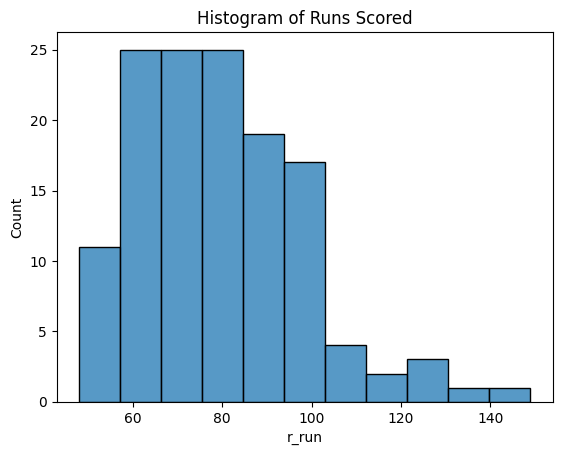

In [11]:
# Histogram of runs scored
sns.histplot(data = data, x = "r_run")
plt.title("Histogram of Runs Scored")
plt.show()

In [12]:
# 75th, 25th, and 90th percentile of runs scored
seventy_five_runs = data["r_run"].quantile(0.75)
twenty_five_runs = data["r_run"].quantile(0.25)
ninety_runs = data["r_run"].quantile(0.90)

# runs scored iqr
runs_iqr = seventy_five_runs - twenty_five_runs

# upper and lower outliers
upper_outlier_runs = seventy_five_runs + (1.5 * runs_iqr)
lower_outlier_runs = twenty_five_runs - (1.5 * runs_iqr)

print("75th Percentile:", seventy_five_runs)
print("25th Percentile:", twenty_five_runs)
print("90th Percentile:", ninety_runs)
print("Interquartile Range:", runs_iqr)
print("Upper Outlier Limit:", upper_outlier_runs)
print("Lower Outlier Limit:", lower_outlier_runs)

75th Percentile: 90.0
25th Percentile: 66.0
90th Percentile: 102.0
Interquartile Range: 24.0
Upper Outlier Limit: 126.0
Lower Outlier Limit: 30.0


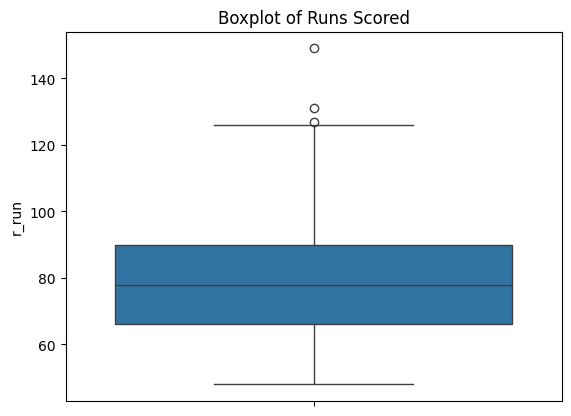

In [13]:
# Boxplot of runs scored
sns.boxplot(data = data, y = "r_run")
plt.title("Boxplot of Runs Scored")
plt.show()

In [14]:
# Summary statistics of runs scored
data["r_run"].describe()

count    133.000000
mean      79.563910
std       18.287002
min       48.000000
25%       66.000000
50%       78.000000
75%       90.000000
max      149.000000
Name: r_run, dtype: float64

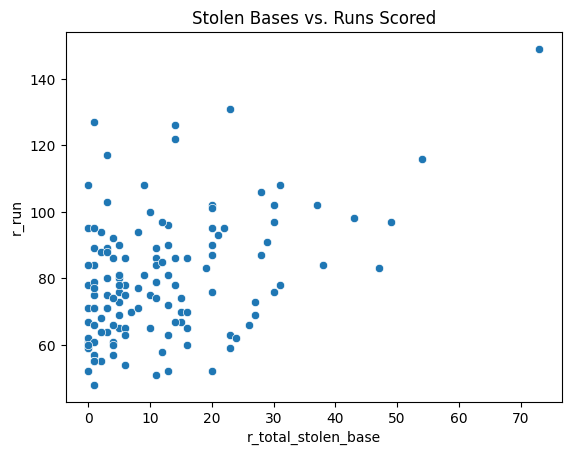

In [15]:
# Scatter plot of stolen bases vs. runs scored.

sns.scatterplot(data = data, x = "r_total_stolen_base", y = "r_run")
plt.title("Stolen Bases vs. Runs Scored")
plt.show()

There appears to be an upward trend, however, the data are not very linear.

In [16]:
# Find the range of the runs scored column
run_range = data["r_run"].max() - data["r_run"].min()
run_max = data["r_run"].max()
run_min = data["r_run"].min()
print("Max Runs Scored:", run_max)
print("Min Runs Scored:", run_min)
print("Range of Runs Scored:", run_range)

Max Runs Scored: 149
Min Runs Scored: 48
Range of Runs Scored: 101


In [17]:
# Import packages for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Perfrom linear regression model using stolen bases as the independent variable.

In [18]:
# Feature selection
X = data["r_total_stolen_base"].values

# Reshape the feature to a 2D array since it's only a singel feature and scikit-learn LinearRegression model expects the input features to be a 2D array
X = X.reshape(-1, 1)

# Target variable
y = data["r_run"].values

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [20]:
# Create linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testting data
y_pred = model.predict(X_test)

In [21]:
# Print the model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 70.72974668771667
Coefficients: [0.71133815]


Interpretation:
Intercept: All other variables are 0.
Coefficient: For a coefficient of ~0.7, it means a one unit increase of that feature is associated with a 0.7 unit increase of the dependent variable. So, a stolen base leads to 0.7 runs.

In [22]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 418.3101744105464


Interpretation:
MSE is a measure of how well the model's predictions match the actual data. Considering the range of the target variable (101), the model did not perform well.

In [23]:
data.columns

Index(['last_name, first_name', 'player_id', 'year', 'ab', 'pa', 'hit', 'walk',
       'batting_avg', 'slg_percent', 'on_base_percent', 'on_base_plus_slg',
       'r_total_caught_stealing', 'r_total_stolen_base', 'b_ab_scoring',
       'r_caught_stealing_2b', 'r_caught_stealing_3b',
       'r_caught_stealing_home', 'r_run', 'r_stolen_base_2b',
       'r_stolen_base_3b', 'r_stolen_base_home', 'r_total_pickoff',
       'Unnamed: 22'],
      dtype='object')

Perform multiple linear regression model.

In [24]:
## Multiple linear regression model - manually choosing the features

# Feature selection, all relavent offensive stats in the dataset
X = data[["r_total_stolen_base", "on_base_percent", "batting_avg", "on_base_plus_slg", "hit", "walk", "slg_percent"]].values

# Target variable
y = data["r_run"].values

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [26]:
# Create linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testting data
y_pred = model.predict(X_test)

In [27]:
# Print the model parameters
print("Intercept:", model.intercept_)
print("Stolen Bases:", model.coef_[0])
print("OBP:", model.coef_[1])
print("Batting Avg:", model.coef_[2])
print("OPS:", model.coef_[3])
print("Hits:", model.coef_[4])
print("Walks:", model.coef_[5])
print("Slugging Percentage:", model.coef_[6])

Intercept: -13.010752287332807
Stolen Bases: 0.42687184789274085
OBP: 50.53366721078338
Batting Avg: -401.0282464093289
OPS: 91.94360264559049
Hits: 0.5398659609487382
Walks: 0.1470871052226661
Slugging Percentage: 41.40993543484508


In [28]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 79.42360263373077


In [29]:
# Apply predictions to dataframe
features = data[["r_total_stolen_base", "on_base_percent", "batting_avg", "on_base_plus_slg", "hit", "walk", "slg_percent"]].values

# Make predictions using the trained model
predictions = model.predict(features)

# Add predictions as a new column to dataframe
data["predicted_runs"] = predictions

# Print actual runs and predicted runs
runs_pred = data[["last_name, first_name", "r_run", "predicted_runs"]]
print(runs_pred)

    last_name, first_name  r_run  predicted_runs
0          Grisham, Trent     67       67.048585
1      Candelario, Jeimer     77       76.786605
2           Hoerner, Nico     98       93.909095
3         Carroll, Corbin    116      110.103324
4      Santander, Anthony     81       85.456747
..                    ...    ...             ...
128     Yoshida, Masataka     71       70.686886
129         Outman, James     86       77.720003
130            Bohm, Alec     74       72.457709
131     Wade Jr., LaMonte     64       64.496083
132       Varsho, Daulton     65       67.316902

[133 rows x 3 columns]


In [30]:
print(runs_pred.head(50))

   last_name, first_name  r_run  predicted_runs
0         Grisham, Trent     67       67.048585
1     Candelario, Jeimer     77       76.786605
2          Hoerner, Nico     98       93.909095
3        Carroll, Corbin    116      110.103324
4     Santander, Anthony     81       85.456747
5            Smith, Will     80       67.749949
6        Swanson, Dansby     81       79.397070
7       Arozarena, Randy     95       90.404437
8           McNeil, Jeff     75       71.868127
9      Walker, Christian     86       92.040484
10          Arraez, Luis     71       79.583079
11           Olson, Matt    127      118.048325
12         Rosario, Amed     70       58.392666
13          Hays, Austin     76       67.145065
14      Rodriguez, Julio    102      108.711102
15         McMahon, Ryan     80       78.033980
16        Ohtani, Shohei    102      114.432634
17         Betts, Mookie    126      115.948576
18     Cronenworth, Jake     54       56.027489
19     Rooker Jr., Brent     61       70

The multiple linear regression model performed quite well. The MSE was an acceptable value, and the predictions closely match the actual values.